# Objective:<br>
#### To visualise how honey production is changed over the years (1998-2016) in the United States.



In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Dataset:¶<br>**
state: Various states of U.S.<br>
numcol: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year<br>
yieldpercol: Honey yield per colony. Unit is pounds<br>
totalprod: Total production (numcol x yieldpercol). Unit is pounds<br>
stocks: Refers to stocks held by producers. Unit is pounds<br>
priceperlb: Refers to average price per pound based on expanded sales. The unit is dollars.<br>
prodvalue: Value of production (totalprod x priceperlb). The unit is dollars.<br>
year: Year of production<br>

In [46]:
honi_data = pd.read_csv("honeyproduction.csv")
honi_data.head(15)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


#### Observations: The dataset looks clean and consistent with the description provided in the Data Dictionary.

In [47]:
honi_data['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012])

In [48]:
honi_data.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

without year

In [49]:
nyrdata = honi_data.iloc[:,:-1]

In [50]:
nyrdata.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07


Observations:<br>

Number of colonies in every state are spread over a huge range. Ranging from 2000 to 510000.<br>
The mean numcol is close to the 75% percentile of the data, indicating a right skew.<br>
As expected, standard deviation of numcol is very high<br>
yieldpercol - Yield per colony also has huge spread ranging from 19 pounds to 136 pounds.<br>
Infact, all the variable seem to have a huge range, we will have to investigate furthur if this spread is mainly across different states or varies in the same state over the years.

/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


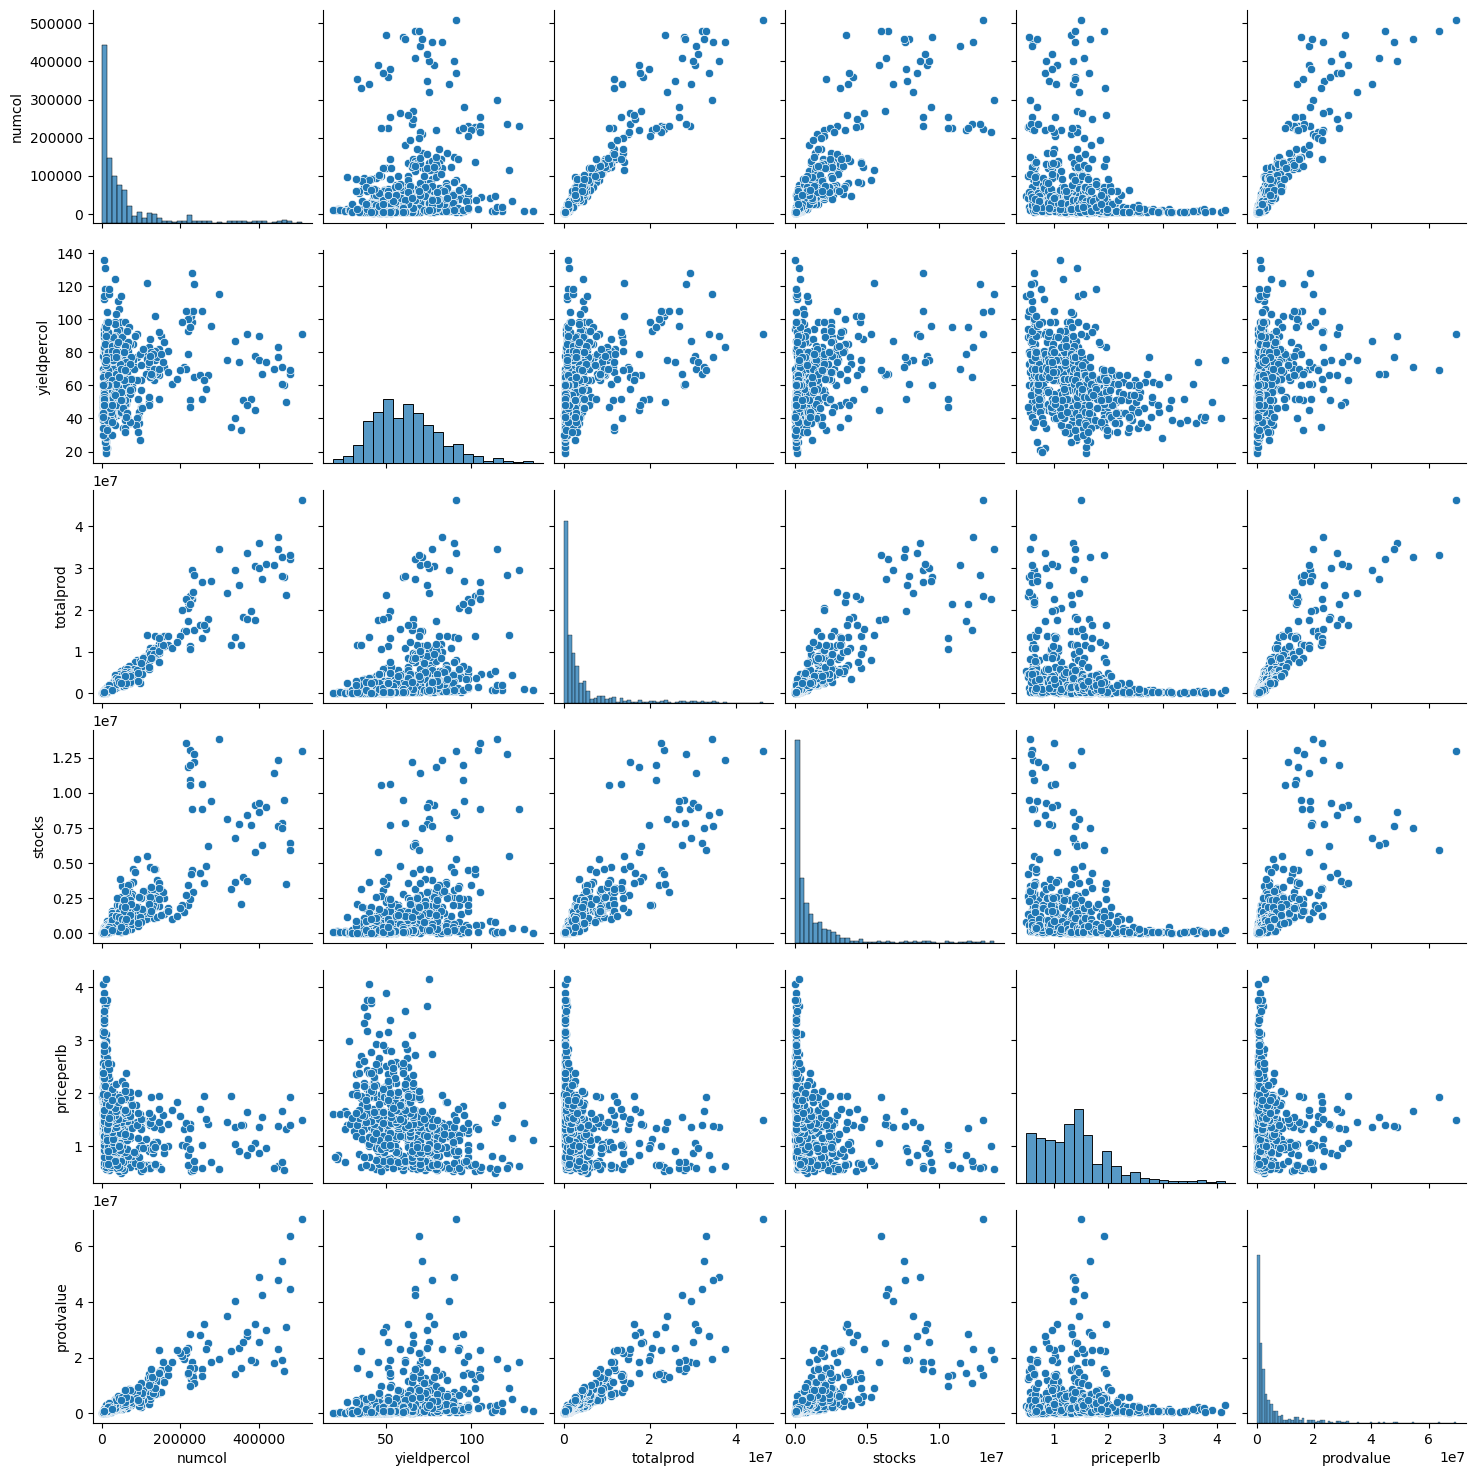

In [51]:
sns.pairplot(nyrdata)
plt.show()

In [52]:
allcorln = nyrdata.corr()
allcorln

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


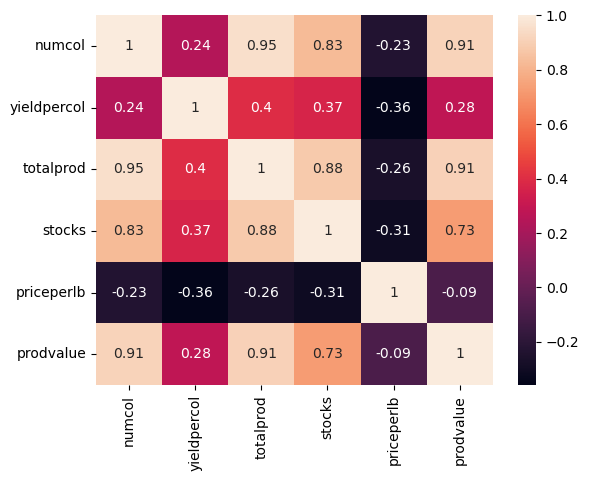

In [53]:
sns.heatmap(allcorln,annot=True)
plt.show()

Observations:<br>

Number of colonies have a high positive correlation with total production, stocks and the value of production. As expected, all these values are highly correlated with each other.<br>
Yield per colony does not have a high correlation with any of the features that we have in our dataset.<br>
Same is the case with priceperlb.<br>
Determining the factors influencing per colony yield and price per pound of honey would need furthur investigation. 

In [54]:
print(nyrdata.state.nunique())

44


In [55]:
print(honi_data.year.nunique())

15


We have honey production data for 44 US states over a span of 15 years, from 1998 to 2012.

### Overall trend of Honey production in US over the years

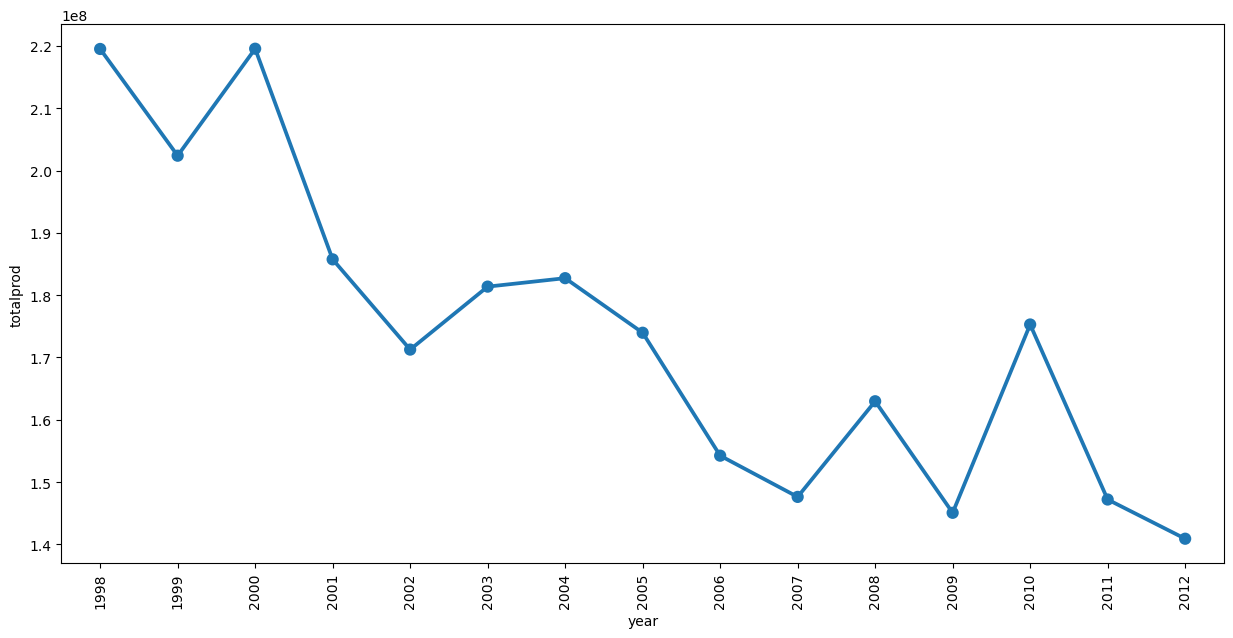

In [60]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='totalprod', data=honi_data,estimator=sum, errorbar=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observations:<br>

The overall honey production in the US has been decresing over the years.<br>
Total honey production = number of colonies * average yield per colony. <br>Let us check if the honey production is decreasing due to one of these factors or both.

### Variation in number of colonies over the years

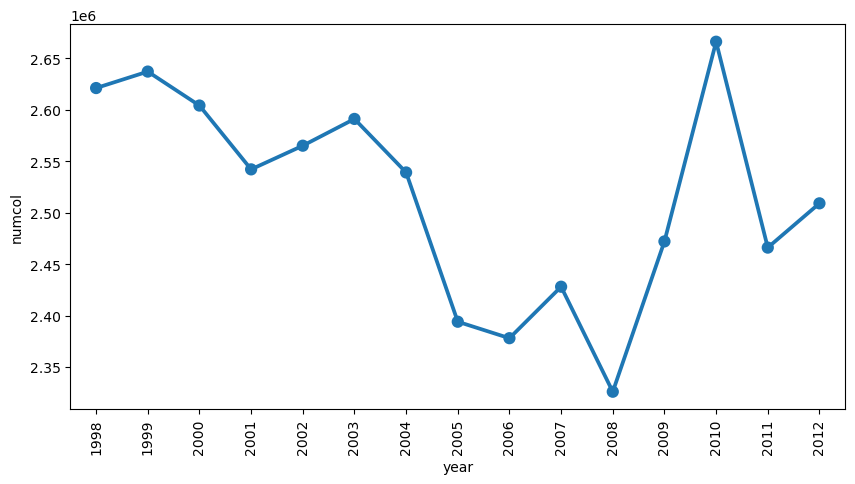

In [63]:
plt.figure(figsize=(10,5))
sns.pointplot(x='year',y='numcol',data=honi_data,estimator=sum,errorbar=None)
plt.xticks(rotation=90)
plt.show()

### Yield of honey per year percolony

<Axes: xlabel='year', ylabel='yieldpercol'>

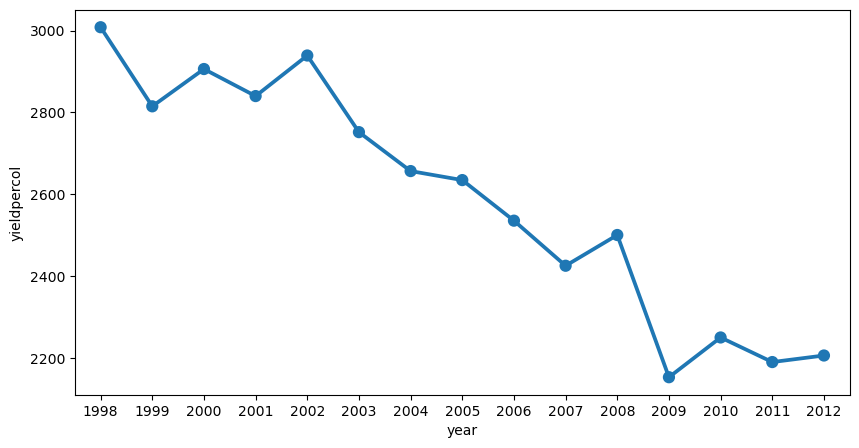

In [64]:
plt.figure(figsize=(10,5))
sns.pointplot(data=honi_data,x='year',y='yieldpercol',estimator='sum',errorbar=None)

<Axes: xlabel='year', ylabel='prodvalue'>

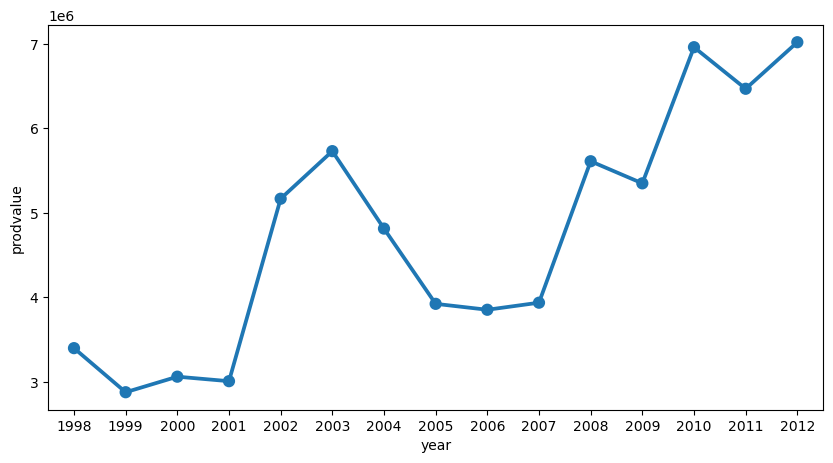

In [65]:
plt.figure(figsize=(10,5))
sns.pointplot(data=honi_data,x='year',y='prodvalue',errorbar=None)

Observation:<br>

In contrast to number of colonies, the yield per colony has been decreasing since 1998.<br>
This indicates that, it is not the number of colonies that is causing a decline in totalhoney production but the yield per colony.<br>
This is an interesting trend. As the total production has declined over the years, the value of production per pound has increased over time.<br>
As the supply declined, the demand has added to the value of honey.<br>

### Let us check which of the states have been capitalising on this trend. We can compare the total production with the stocks held by the producers.

/var/folders/yp/tcxqwqns2w52l01lkcdwsy6w0000gn/T/ipykernel_3572/3212304122.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="totalprod", y="state", data=honi_data.sort_values("totalprod", ascending=False),
/var/folders/yp/tcxqwqns2w52l01lkcdwsy6w0000gn/T/ipykernel_3572/3212304122.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="stocks", y="state", data=honi_data.sort_values("totalprod", ascending=False),


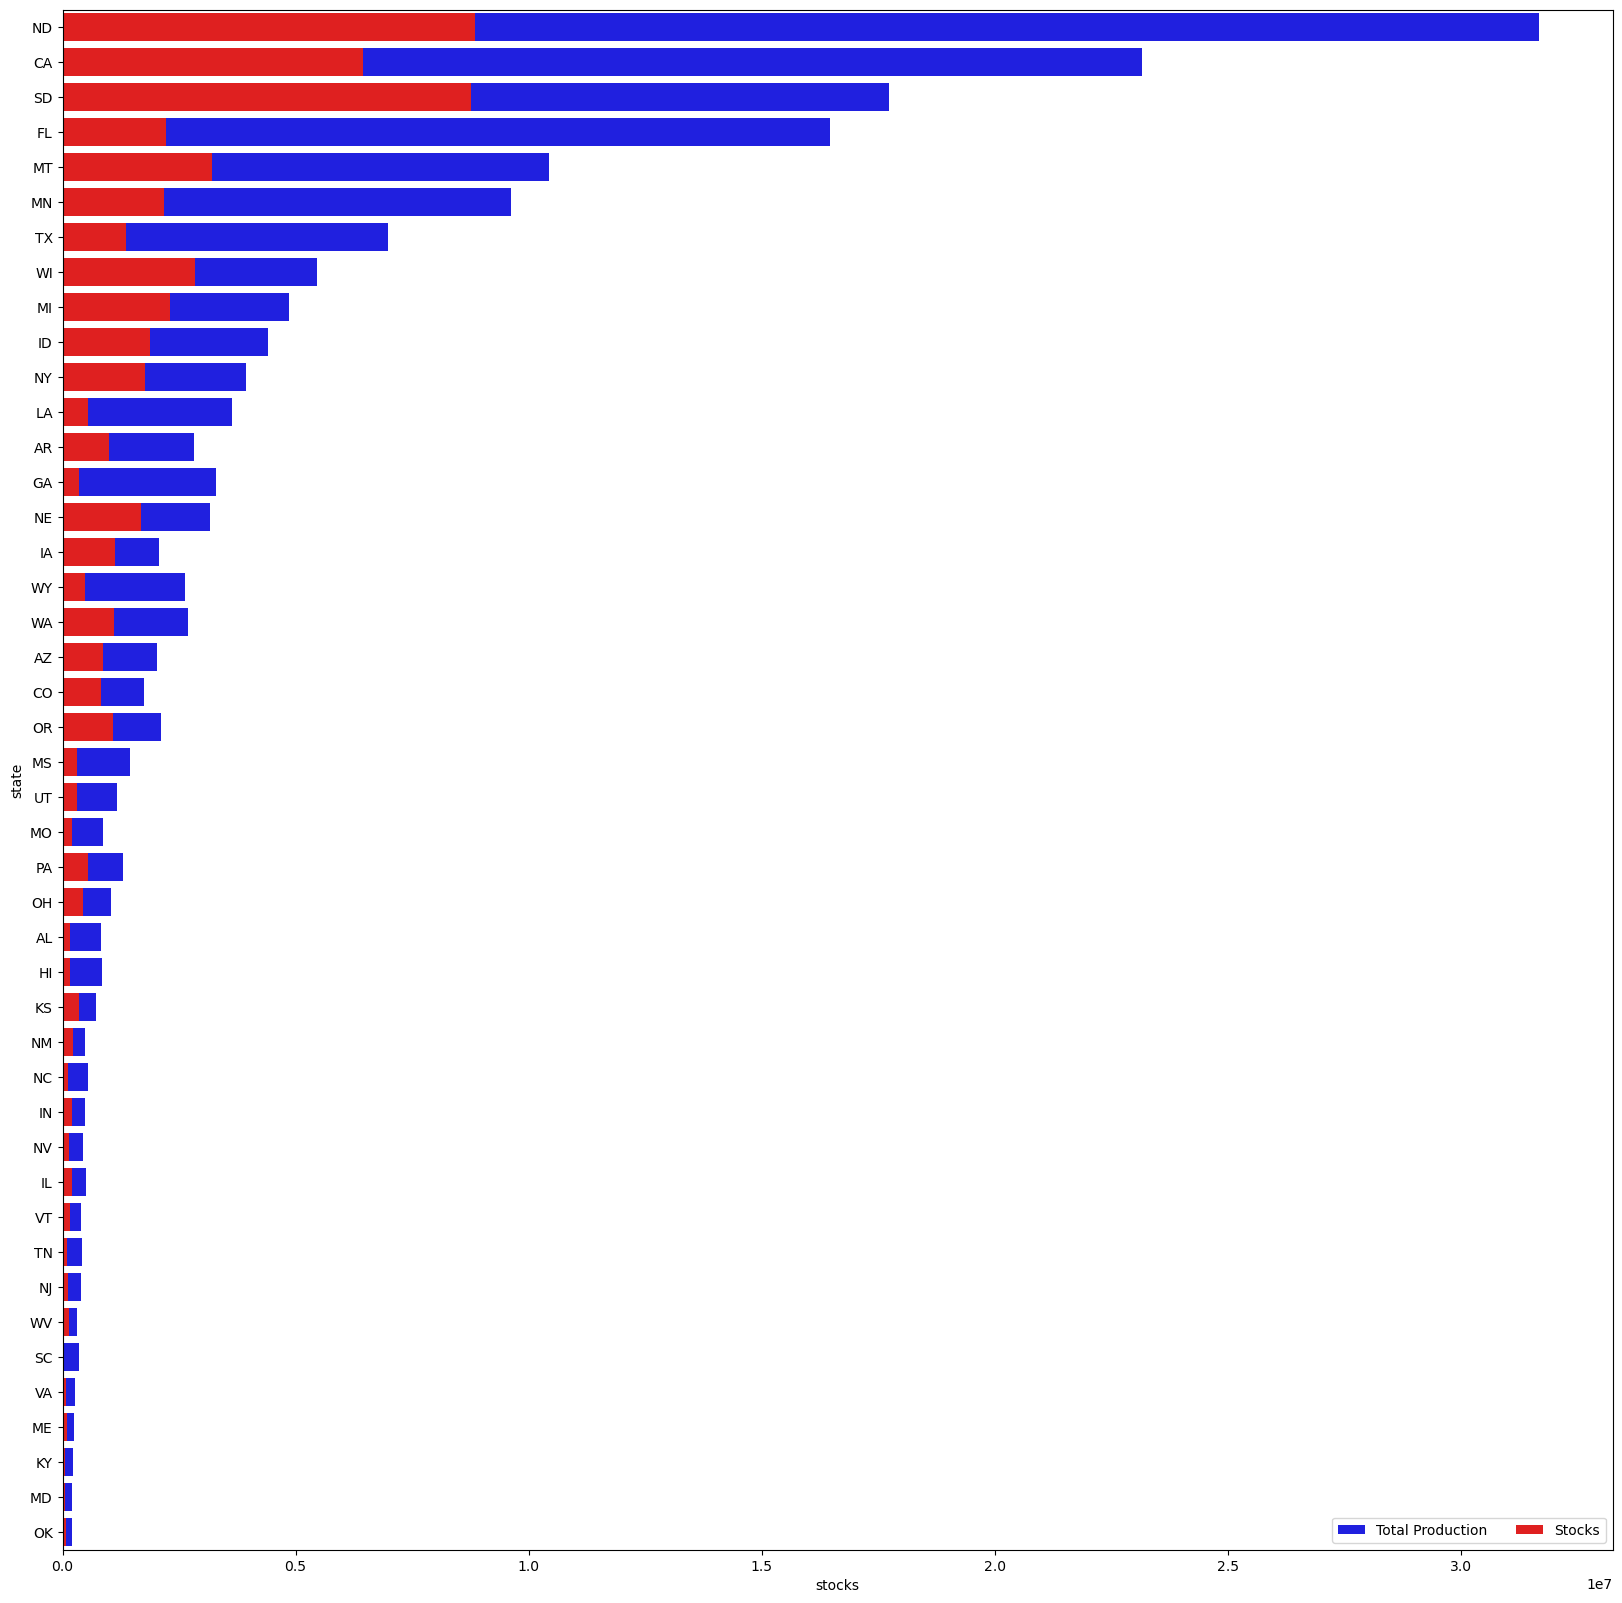

In [66]:
plt.figure(figsize = (20,20))

sns.barplot(x="totalprod", y="state", data=honi_data.sort_values("totalprod", ascending=False),
            label="Total Production", color="b", ci=None)

sns.barplot(x="stocks", y="state", data=honi_data.sort_values("totalprod", ascending=False),
            label="Stocks", color="r", ci=None)


plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

Observations:<br>

North Dakota has been able to sell more honey as compared to South Dakota despite having the highest production value.<br>
Florida has the highest efficiency among the major honey producing states<br>
Michigan is more efficient than Wisconsin in selling honey.<br>

**Conclusion:<br>**
>We can conclude that the total honey production has declined over the years whereas the value of production per pound has increased.<br>
>The reason for the declined honey production is the decrease in the yield per colony over the years.<br>
>The major honey producing states are California, Florida, North Dakota, South Dakota and Montana.<br>
>Among these, Florida has been very efficient in selling honey.<br>